# Explore here

In [17]:
import os
import pandas as pd
import requests
#import seaborn as sns
from dotenv import load_dotenv

# load the .env file variables
load_dotenv()

import os

client_id = os.environ.get("CLIENT_ID")
client_secret = os.environ.get("CLIENT_SECRET")

client_id


'dd1a0db784194f79b057b2db6e01388b'

In [18]:
import base64

# Encode the client credentials
client_credentials = f"{client_id}:{client_secret}"
client_credentials_base64 = base64.b64encode(client_credentials.encode())

# Prepare the token request
token_url = "https://accounts.spotify.com/api/token"
headers = {
    "Authorization": f"Basic {client_credentials_base64.decode()}"
}
data = {
    "grant_type": "client_credentials"
}

# Request access token
response = requests.post(token_url, headers=headers, data=data)

# Check if the request was successful
if response.status_code == 200:
    access_token = response.json()['access_token']
    print("Access token obtained!")
else:
    print(f"Failed to obtain access token. Status code: {response.status_code}")
    print(response.text)

Access token obtained!


In [19]:
access_token

'BQAN2LL2xM6DTqdFfuWtq9F41nW0uhUWP0Bi1wH8hed-2IBXnAG8yQTiPsEqiBLh7BVIFYTzQ5lnq2j_so988Ee5Kt46RhMM9R1-tc7Sjp9MoD7nMvU'

In [20]:
# Set the access token in the headers
headers = {
    "Authorization": f"Bearer {'BQDHkuW8F3Iqzbuz1ylbp11QAVy3BLUXie4ICp3h2ArAFF5ORBQ3vsFgTXvHOx-3YJdDmjwBZgWOLIas2jbcO29yoEKvBFDgCW5t10gTT9ouvePAcQA'}"
}

# Define the endpoint and parameters
search_url = "https://api.spotify.com/v1/search"
params = {
    "q": "The Gaslight Anthem",  # Artist name to search for
    "type": "artist",
    "limit": 1
}

# Make the API request to search for the artist
response = requests.get(search_url, headers=headers, params=params)

# Check if the request was successful
if response.status_code == 200:
    response_data = response.json()
    # print(f"Response Data: {response_data}")
    artist_id = response_data['artists']['items'][0]['id']
    artist_name = response_data['artists']['items'][0]['name']
    print(f"Found artist: {artist_name} (ID: {artist_id})")
else:
    print(f"Failed to search for artist. Status code: {response.status_code}")
    print(response.text)

Found artist: The Gaslight Anthem (ID: 7If8DXZN7mlGdQkLE2FaMo)


In [21]:
# Define the endpoint for the artist's top tracks
top_tracks_url = f"https://api.spotify.com/v1/artists/{'7If8DXZN7mlGdQkLE2FaMo'}/top-tracks"
params = {
    "market": "US"  # Specify the market (country)
}

# Make the API request to get top tracks
response = requests.get(top_tracks_url, headers=headers, params=params)

# Check if the request was successful
if response.status_code == 200:
    top_tracks_data = response.json()
    print(f"Top tracks for {artist_name}:")
    for idx, track in enumerate(top_tracks_data['tracks'], start=1):
        # print(f"Track data: {track}")
        track_name = track['name']
        album_name = track['album']['name']
        print(f"{idx}. {track_name} - Album: {album_name}")
else:
    print(f"Failed to get top tracks. Status code: {response.status_code}")
    print(response.text)

Top tracks for The Gaslight Anthem:
1. "45" - Album: Handwritten
2. The '59 Sound - Album: The '59 Sound
3. Great Expectations - Album: The '59 Sound
4. Here's Lookin At You, Kid - Album: The '59 Sound
5. Old White Lincoln - Album: The '59 Sound
6. History Books (feat. Bruce Springsteen) - Album: History Books
7. Get Hurt - Album: Get Hurt
8. Ocean Eyes - Album: History Books (Expanded Edition)
9. Handwritten - Album: Handwritten
10. American Slang - Album: American Slang


In [22]:
def get_access_token(client_id, client_secret):
    try:
        # Encoding and token request as before
        client_credentials = f"{client_id}:{client_secret}"
        client_credentials_base64 = base64.b64encode(client_credentials.encode())
        token_url = "https://accounts.spotify.com/api/token"
        headers = {
            "Authorization": f"Basic {client_credentials_base64.decode()}"
        }
        data = {
            "grant_type": "client_credentials"
        }
        response = requests.post(token_url, headers=headers, data=data)
        response.raise_for_status()  # Raises an HTTPError for bad status codes
        access_token = response.json()['access_token']
        return access_token
    except requests.exceptions.HTTPError as err:
        print(f"HTTP error occurred: {err}")
    except Exception as err:
        print(f"An error occurred: {err}")
    return None

# Use the function to get the access token
access_token = get_access_token(client_id, client_secret)
if access_token:
    print("Access token obtained successfully.")
else:
    print("Failed to obtain access token.")
    

Access token obtained successfully.


In [29]:
import json

# Load the API response
print(response.text)
data = json.loads(response.text)

# Process tracks
most_played_tracks = []

for track in data.get("tracks", []):
    track_info = {
        "name": track["name"],
        "popularity": track["popularity"],
        "duration_minutes": track["duration_ms"] / 60000  # Convert milliseconds to minutes
    }
    most_played_tracks.append(track_info)

# Print the results
for track in most_played_tracks:
    print(f"Song: {track['name']}, Popularity: {track['popularity']}, Duration: {track['duration_minutes']:.2f} minutes")


{"tracks":[{"album":{"album_type":"album","artists":[{"external_urls":{"spotify":"https://open.spotify.com/artist/7If8DXZN7mlGdQkLE2FaMo"},"href":"https://api.spotify.com/v1/artists/7If8DXZN7mlGdQkLE2FaMo","id":"7If8DXZN7mlGdQkLE2FaMo","name":"The Gaslight Anthem","type":"artist","uri":"spotify:artist:7If8DXZN7mlGdQkLE2FaMo"}],"external_urls":{"spotify":"https://open.spotify.com/album/1gsyJWUvwjnsNgYUxpOfLR"},"href":"https://api.spotify.com/v1/albums/1gsyJWUvwjnsNgYUxpOfLR","id":"1gsyJWUvwjnsNgYUxpOfLR","images":[{"url":"https://i.scdn.co/image/ab67616d0000b2731170b332cf9a3e4160dd057a","width":640,"height":640},{"url":"https://i.scdn.co/image/ab67616d00001e021170b332cf9a3e4160dd057a","width":300,"height":300},{"url":"https://i.scdn.co/image/ab67616d000048511170b332cf9a3e4160dd057a","width":64,"height":64}],"is_playable":true,"name":"Handwritten","release_date":"2012-01-01","release_date_precision":"day","total_tracks":14,"type":"album","uri":"spotify:album:1gsyJWUvwjnsNgYUxpOfLR"},"art

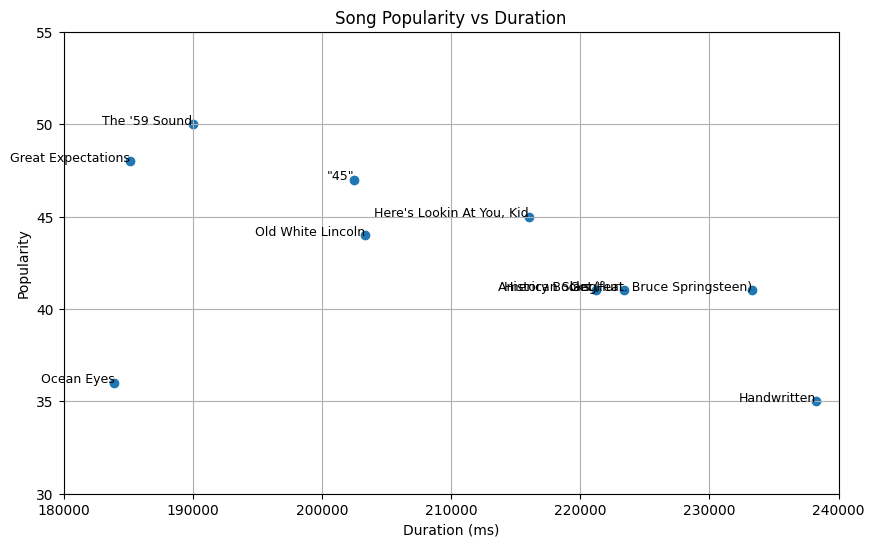

In [32]:
import json
import matplotlib.pyplot as plt

popularity = [track['popularity'] for track in data['tracks']]
duration = [track['duration_ms'] for track in data['tracks']]
song_names = [track['name'] for track in data['tracks']]

plt.figure(figsize=(10, 6))
plt.scatter(duration, popularity)

for i, name in enumerate(song_names):
    plt.annotate(name, (duration[i], popularity[i]), fontsize=9, ha='right')

plt.title('Song Popularity vs Duration')
plt.xlabel('Duration (ms)')
plt.ylabel('Popularity')
plt.xlim(180000, 240000)  
plt.ylim(30, 55)  
plt.grid()

plt.show()